In [1]:
import os
from scipy.io import arff
from fABBA import JABBA
from software.qabba import QABBA

import matplotlib.pyplot as plt
import numpy as np

_dir = 'UEA2018' # your data file location
tols = [0.05, 0.005]
alphas = [0.005]

thickline = 14
thinline = 11
def preprocess(data):
    time_series = list()
    for ii in data[0]:
        database = list()
        for i in ii[0]:
            database.append(list(i))
        time_series.append(database)
    return np.nan_to_num(np.array(time_series))

files = ['AtrialFibrillation', 'BasicMotions', 'CharacterTrajectories', 
         'Epilepsy', 'JapaneseVowels', 'NATOPS', 'UWaveGestureLibrary']




Generate 218 symbols
Generate 218 symbols


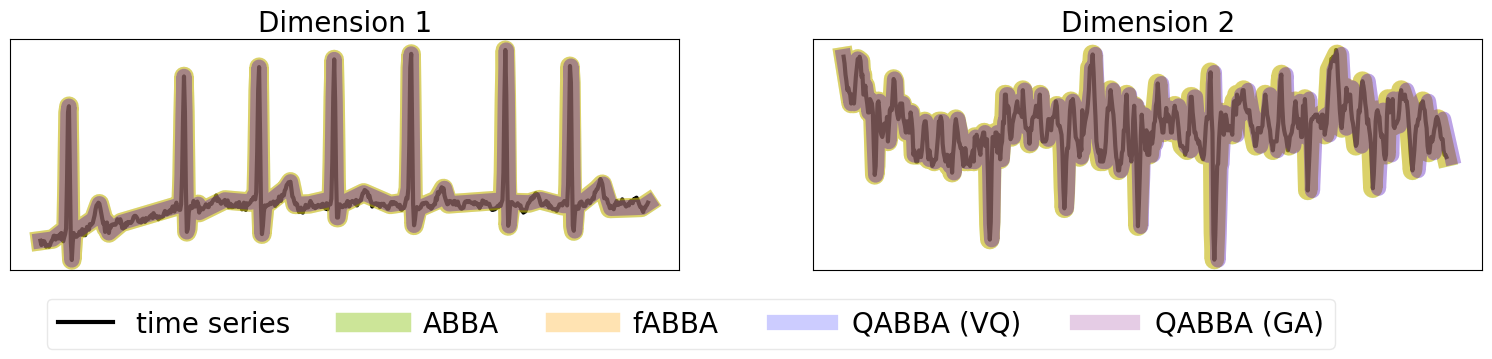

In [2]:
num = 0
data = arff.loadarff(os.path.join(_dir, os.path.join(files[num], files[num]+'_TRAIN.arff')))
multivariate_ts = preprocess(data)

mts =((multivariate_ts[0].T - multivariate_ts[0].T.mean(axis=0)) /multivariate_ts[0].T.std(axis=0)).T

jabba1 = JABBA(tol=0.05, init="agg", alpha=0.005, verbose=1)
symbols_series = jabba1.fit_transform(mts)
reconstruction_JABBA1 = jabba1.inverse_transform(symbols_series)

jabba2 = JABBA(tol=0.05, init="kmeans", k=jabba1.parameters.centers.shape[0], verbose=1)
symbols_series = jabba2.fit_transform(mts)
reconstruction_JABBA2 = jabba2.inverse_transform(symbols_series)

qabba1 = QABBA(tol=0.05, init="agg", alpha=0.005, bits_for_len=8, bits_for_inc=12, verbose=0)
symbols_series = qabba1.fit_transform(mts)
reconstruction_QABBA1= qabba1.inverse_transform(symbols_series)

qabba2 = QABBA(tol=0.05, init="kmeans", k=qabba1.parameters.centers.shape[0], bits_for_len=8, bits_for_inc=12, verbose=0)
symbols_series = qabba2.fit_transform(mts)
reconstruction_QABBA2 = qabba2.inverse_transform(symbols_series)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(19, 3))

for i in range(1):
    for j in range(2):
        ax[j].plot(mts[i*3 + j], c='black', linewidth=3, alpha=1, label='time series')
        ax[j].plot(reconstruction_JABBA1[i*3 + j], c='yellowgreen', linewidth=thickline, alpha=0.5, label='ABBA')
        ax[j].plot(reconstruction_JABBA2[i*3 + j], c='orange', linewidth=thickline, alpha=0.3, label='fABBA')
        ax[j].plot(reconstruction_QABBA1[i*3 + j], c='blue', linewidth=thinline, alpha=0.2, label='QABBA (VQ)')
        ax[j].plot(reconstruction_QABBA2[i*3 + j], c='purple', linewidth=thinline, alpha=0.2, label='QABBA (GA)')

        ax[j].set_title('Dimension '+str(j+1), fontsize=20)
        ax[j].set_xticks([]);ax[j].set_yticks([])

plt.legend(loc='lower right', bbox_to_anchor=[0.8, -0.4], ncols=5, framealpha=0.45, fontsize=20)
plt.savefig('figs/recontruction_'+files[num]+'.pdf', bbox_inches='tight')
plt.show()

Generate 249 symbols
Generate 249 symbols


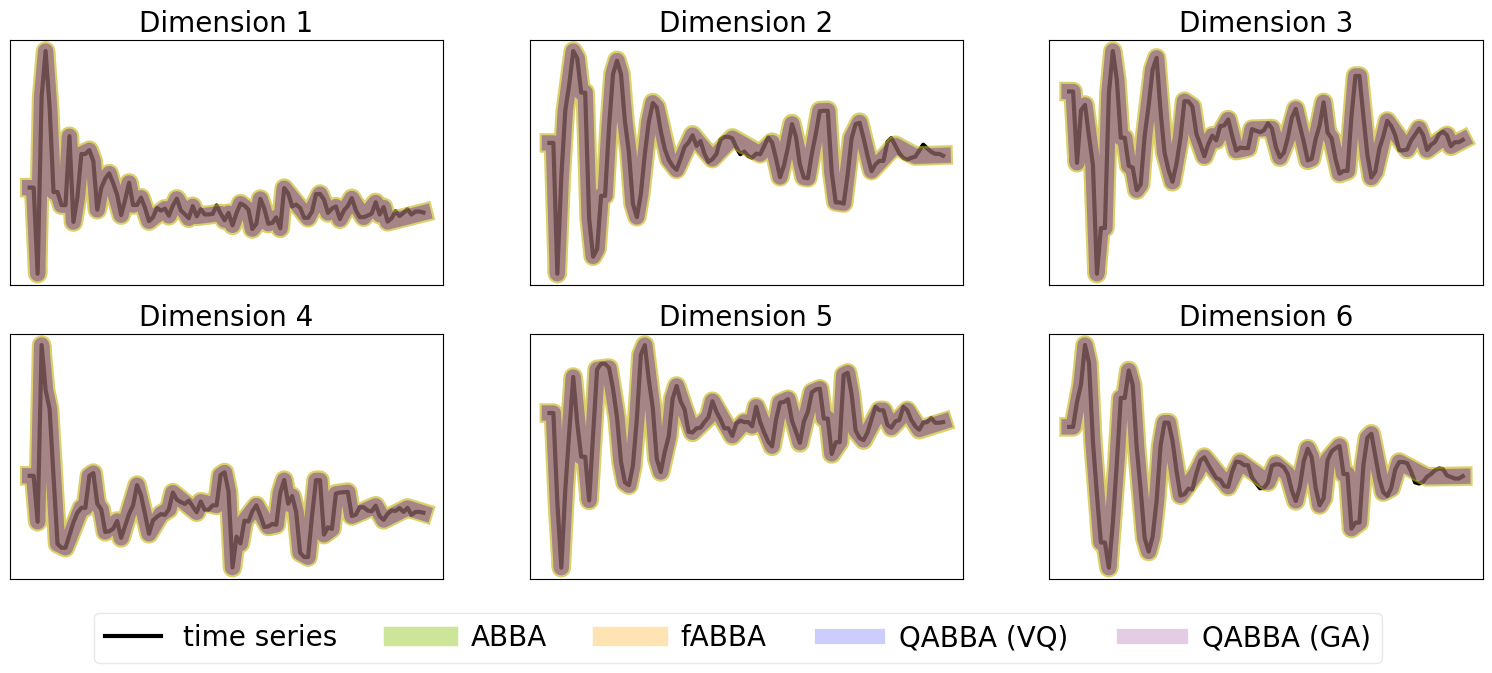

In [3]:
num = 1
data = arff.loadarff(os.path.join(_dir, os.path.join(files[num], files[num]+'_TRAIN.arff')))
multivariate_ts = preprocess(data)

mts =((multivariate_ts[0].T - multivariate_ts[0].T.mean(axis=0)) /multivariate_ts[0].T.std(axis=0)).T

jabba1 = JABBA(tol=0.05, init="agg", alpha=0.005, verbose=1)
symbols_series = jabba1.fit_transform(mts)
reconstruction_JABBA1 = jabba1.inverse_transform(symbols_series)

jabba2 = JABBA(tol=0.05, init="kmeans", k=jabba1.parameters.centers.shape[0], verbose=1)
symbols_series = jabba2.fit_transform(mts)
reconstruction_JABBA2 = jabba2.inverse_transform(symbols_series)

qabba1 = QABBA(tol=0.05, init="agg", alpha=0.005, bits_for_len=8, bits_for_inc=12, verbose=0)
symbols_series = qabba1.fit_transform(mts)
reconstruction_QABBA1= qabba1.inverse_transform(symbols_series)

qabba2 = QABBA(tol=0.05, init="kmeans", k=qabba1.parameters.centers.shape[0], bits_for_len=8, bits_for_inc=12, verbose=0)
symbols_series = qabba2.fit_transform(mts)
reconstruction_QABBA2 = qabba2.inverse_transform(symbols_series)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(19, 7))

for i in range(2):
    for j in range(3):
        ax[i,j].plot(mts[i*3 + j], c='black', linewidth=3, alpha=1, label='time series')
        ax[i,j].plot(reconstruction_JABBA1[i*3 + j], c='yellowgreen', linewidth=thickline, alpha=0.5, label='ABBA')
        ax[i,j].plot(reconstruction_JABBA2[i*3 + j], c='orange', linewidth=thickline, alpha=0.3, label='fABBA')
        ax[i,j].plot(reconstruction_QABBA1[i*3 + j], c='blue', linewidth=thinline, alpha=0.2, label='QABBA (VQ)')
        ax[i,j].plot(reconstruction_QABBA2[i*3 + j], c='purple', linewidth=thinline, alpha=0.2, label='QABBA (GA)')

        ax[i,j].set_title('Dimension '+str(i*3 + j+1), fontsize=20)
        ax[i,j].set_xticks([]);ax[i,j].set_yticks([])

plt.legend(loc='lower right', bbox_to_anchor=[0.8, -0.4], ncols=5, framealpha=0.45, fontsize=20)
plt.savefig('figs/recontruction_'+files[num]+'.pdf', bbox_inches='tight')
plt.show()

Generate 30 symbols
Generate 30 symbols


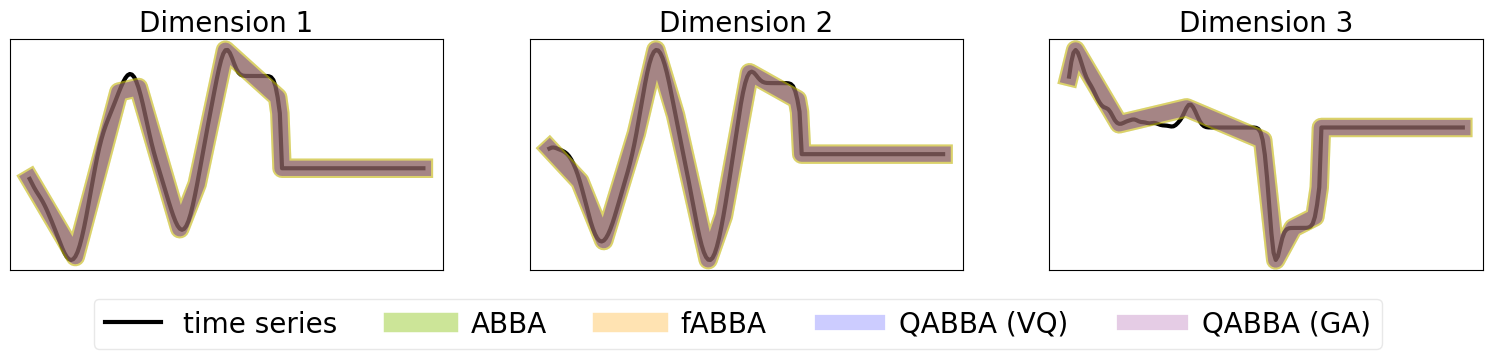

In [4]:
num = 2
data = arff.loadarff(os.path.join(_dir, os.path.join(files[num], files[num]+'_TRAIN.arff')))
multivariate_ts = preprocess(data)

mts =((multivariate_ts[0].T - multivariate_ts[0].T.mean(axis=0)) /multivariate_ts[0].T.std(axis=0)).T

jabba1 = JABBA(tol=0.05, init="agg", alpha=0.005, verbose=1)
symbols_series = jabba1.fit_transform(mts)
reconstruction_JABBA1 = jabba1.inverse_transform(symbols_series)

jabba2 = JABBA(tol=0.05, init="kmeans", k=jabba1.parameters.centers.shape[0], verbose=1)
symbols_series = jabba2.fit_transform(mts)
reconstruction_JABBA2 = jabba2.inverse_transform(symbols_series)

qabba1 = QABBA(tol=0.05, init="agg", alpha=0.005, bits_for_len=8, bits_for_inc=12, verbose=0)
symbols_series = qabba1.fit_transform(mts)
reconstruction_QABBA1= qabba1.inverse_transform(symbols_series)

qabba2 = QABBA(tol=0.05, init="kmeans", k=qabba1.parameters.centers.shape[0], bits_for_len=8, bits_for_inc=12, verbose=0)
symbols_series = qabba2.fit_transform(mts)
reconstruction_QABBA2 = qabba2.inverse_transform(symbols_series)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(19, 3))

for i in range(1):
    for j in range(3):
        ax[j].plot(mts[i*3 + j], c='black', linewidth=3, alpha=1, label='time series')
        ax[j].plot(reconstruction_JABBA1[i*3 + j], c='yellowgreen', linewidth=thickline, alpha=0.5, label='ABBA')
        ax[j].plot(reconstruction_JABBA2[i*3 + j], c='orange', linewidth=thickline, alpha=0.3, label='fABBA')
        ax[j].plot(reconstruction_QABBA1[i*3 + j], c='blue', linewidth=thinline, alpha=0.2, label='QABBA (VQ)')
        ax[j].plot(reconstruction_QABBA2[i*3 + j], c='purple', linewidth=thinline, alpha=0.2, label='QABBA (GA)')

        ax[j].set_title('Dimension '+str(j+1), fontsize=20)
        ax[j].set_xticks([]);ax[j].set_yticks([])

plt.legend(loc='lower right', bbox_to_anchor=[0.8, -0.4], ncols=5, framealpha=0.45, fontsize=20)
plt.savefig('figs/recontruction_'+files[num]+'.pdf', bbox_inches='tight')
plt.show()

Generate 203 symbols
Generate 203 symbols


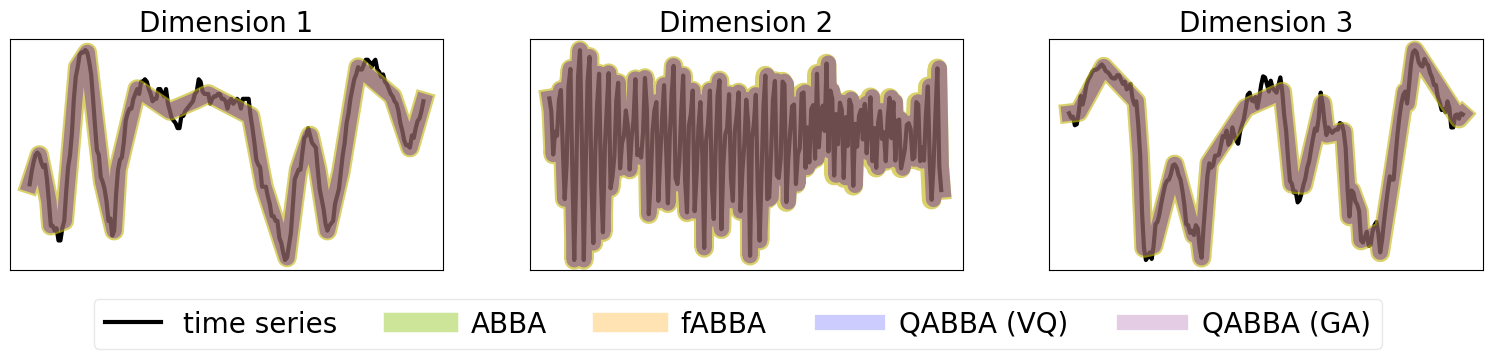

In [5]:
num = 3
data = arff.loadarff(os.path.join(_dir, os.path.join(files[num], files[num]+'_TRAIN.arff')))
multivariate_ts = preprocess(data)

mts =((multivariate_ts[0].T - multivariate_ts[0].T.mean(axis=0)) /multivariate_ts[0].T.std(axis=0)).T

jabba1 = JABBA(tol=0.05, init="agg", alpha=0.005, verbose=1)
symbols_series = jabba1.fit_transform(mts)
reconstruction_JABBA1 = jabba1.inverse_transform(symbols_series)

jabba2 = JABBA(tol=0.05, init="kmeans", k=jabba1.parameters.centers.shape[0], verbose=1)
symbols_series = jabba2.fit_transform(mts)
reconstruction_JABBA2 = jabba2.inverse_transform(symbols_series)

qabba1 = QABBA(tol=0.05, init="agg", alpha=0.005, bits_for_len=8, bits_for_inc=12, verbose=0)
symbols_series = qabba1.fit_transform(mts)
reconstruction_QABBA1= qabba1.inverse_transform(symbols_series)

qabba2 = QABBA(tol=0.05, init="kmeans", k=qabba1.parameters.centers.shape[0], bits_for_len=8, bits_for_inc=12, verbose=0)
symbols_series = qabba2.fit_transform(mts)
reconstruction_QABBA2 = qabba2.inverse_transform(symbols_series)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(19, 3))

for i in range(1):
    for j in range(3):
        ax[j].plot(mts[i*3 + j], c='black', linewidth=3, alpha=1, label='time series')
        ax[j].plot(reconstruction_JABBA1[i*3 + j], c='yellowgreen', linewidth=thickline, alpha=0.5, label='ABBA')
        ax[j].plot(reconstruction_JABBA2[i*3 + j], c='orange', linewidth=thickline, alpha=0.3, label='fABBA')
        ax[j].plot(reconstruction_QABBA1[i*3 + j], c='blue', linewidth=thinline, alpha=0.2, label='QABBA (VQ)')
        ax[j].plot(reconstruction_QABBA2[i*3 + j], c='purple', linewidth=thinline, alpha=0.2, label='QABBA (GA)')

        ax[j].set_title('Dimension '+str(j+1), fontsize=20)
        ax[j].set_xticks([]);ax[j].set_yticks([])

plt.legend(loc='lower right', bbox_to_anchor=[0.8, -0.4], ncols=5, framealpha=0.45, fontsize=20)
plt.savefig('figs/recontruction_'+files[num]+'.pdf', bbox_inches='tight')
plt.show()

Generate 78 symbols
Generate 78 symbols


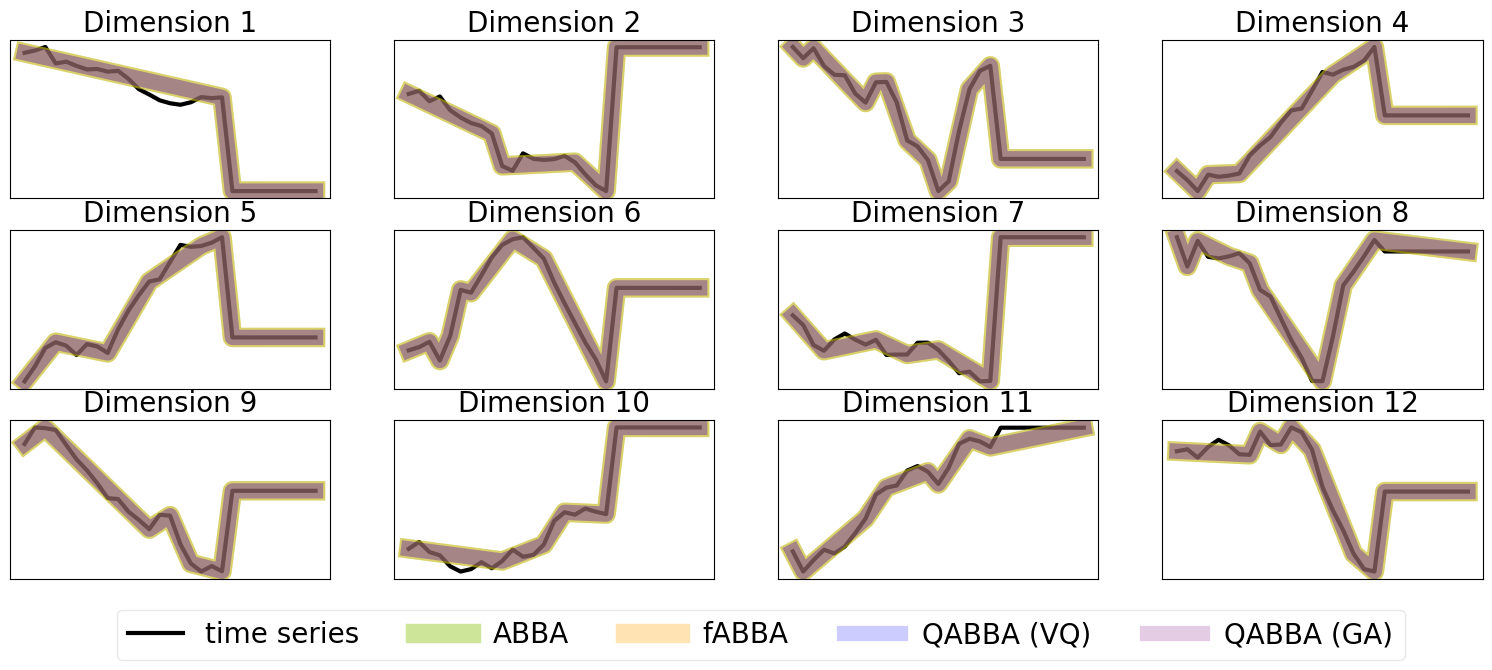

In [6]:
num = 4
data = arff.loadarff(os.path.join(_dir, os.path.join(files[num], files[num]+'_TRAIN.arff')))
multivariate_ts = preprocess(data)

mts =((multivariate_ts[0].T - multivariate_ts[0].T.mean(axis=0)) /multivariate_ts[0].T.std(axis=0)).T

jabba1 = JABBA(tol=0.05, init="agg", alpha=0.005, verbose=1)
symbols_series = jabba1.fit_transform(mts)
reconstruction_JABBA1 = jabba1.inverse_transform(symbols_series)

jabba2 = JABBA(tol=0.05, init="kmeans", k=jabba1.parameters.centers.shape[0], verbose=1)
symbols_series = jabba2.fit_transform(mts)
reconstruction_JABBA2 = jabba2.inverse_transform(symbols_series)

qabba1 = QABBA(tol=0.05, init="agg", alpha=0.005, bits_for_len=8, bits_for_inc=12, verbose=0)
symbols_series = qabba1.fit_transform(mts)
reconstruction_QABBA1= qabba1.inverse_transform(symbols_series)

qabba2 = QABBA(tol=0.05, init="kmeans", k=qabba1.parameters.centers.shape[0], bits_for_len=8, bits_for_inc=12, verbose=0)
symbols_series = qabba2.fit_transform(mts)
reconstruction_QABBA2 = qabba2.inverse_transform(symbols_series)

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(19, 7))

for i in range(3):
    for j in range(4):
        ax[i,j].plot(mts[i*4 + j], c='black', linewidth=3, alpha=1, label='time series')
        ax[i,j].plot(reconstruction_JABBA1[i*4 + j], c='yellowgreen', linewidth=thickline, alpha=0.5, label='ABBA')
        ax[i,j].plot(reconstruction_JABBA2[i*4 + j], c='orange', linewidth=thickline, alpha=0.3, label='fABBA')
        ax[i,j].plot(reconstruction_QABBA1[i*4 + j], c='blue', linewidth=thinline, alpha=0.2, label='QABBA (VQ)')
        ax[i,j].plot(reconstruction_QABBA2[i*4 + j], c='purple', linewidth=thinline, alpha=0.2, label='QABBA (GA)')

        ax[i,j].set_title('Dimension '+str(i*4 + j+1), fontsize=20)
        ax[i,j].set_xticks([]);ax[i,j].set_yticks([])

plt.legend(loc='lower right', bbox_to_anchor=[0.8, -0.6], ncols=5, framealpha=0.45, fontsize=20)
plt.savefig('figs/recontruction_'+files[num]+'.pdf', bbox_inches='tight')
plt.show()

Generate 239 symbols
Generate 239 symbols


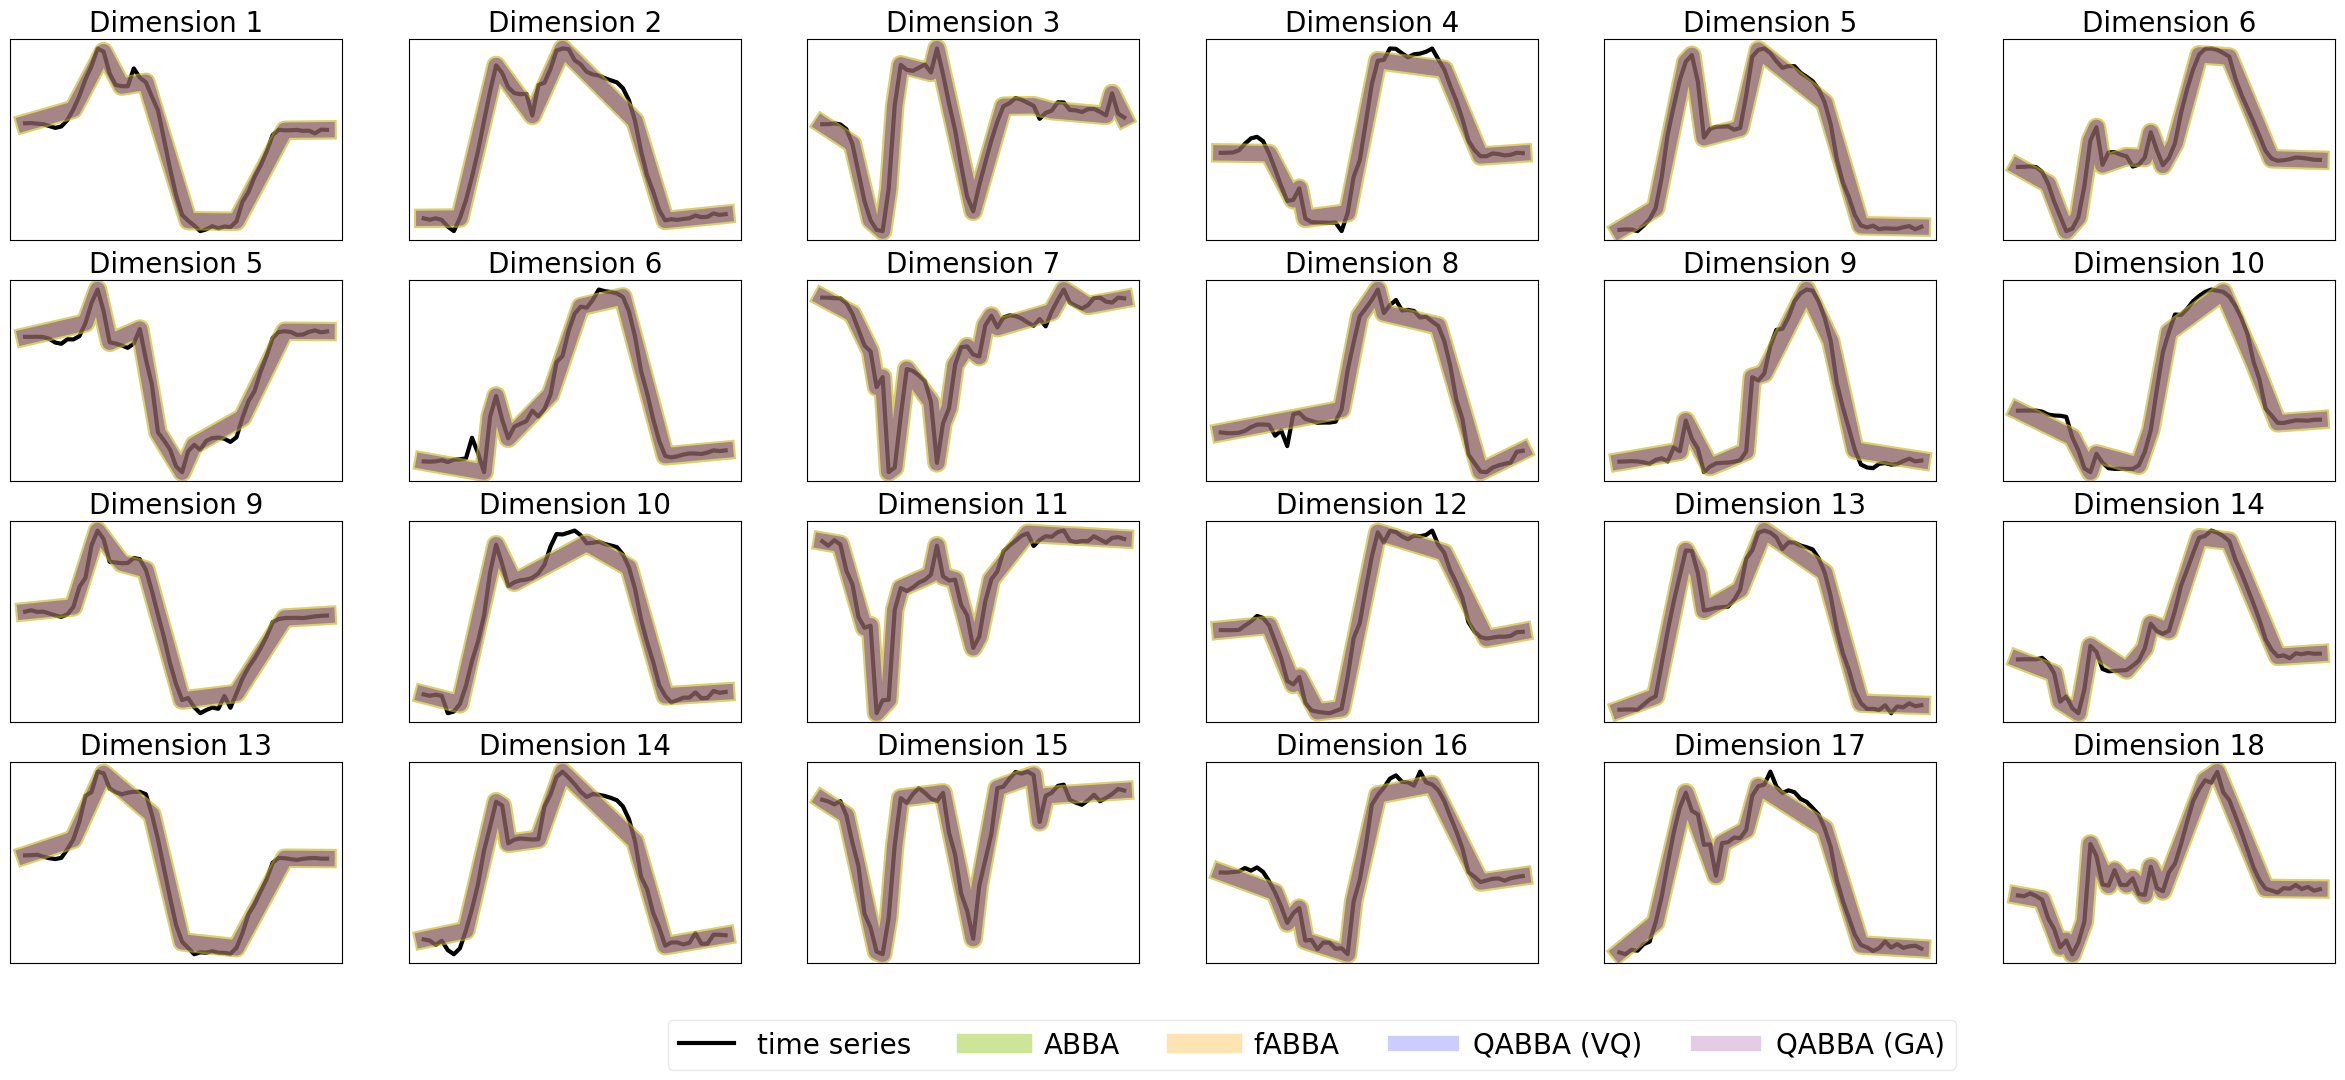

In [7]:
num = 5
data = arff.loadarff(os.path.join(_dir, os.path.join(files[num], files[num]+'_TRAIN.arff')))
multivariate_ts = preprocess(data)

mts =((multivariate_ts[0].T - multivariate_ts[0].T.mean(axis=0)) /multivariate_ts[0].T.std(axis=0)).T

jabba1 = JABBA(tol=0.05, init="agg", alpha=0.005, verbose=1)
symbols_series = jabba1.fit_transform(mts)
reconstruction_JABBA1 = jabba1.inverse_transform(symbols_series)

jabba2 = JABBA(tol=0.05, init="kmeans", k=jabba1.parameters.centers.shape[0], verbose=1)
symbols_series = jabba2.fit_transform(mts)
reconstruction_JABBA2 = jabba2.inverse_transform(symbols_series)

qabba1 = QABBA(tol=0.05, init="agg", alpha=0.005, bits_for_len=8, bits_for_inc=12, verbose=0)
symbols_series = qabba1.fit_transform(mts)
reconstruction_QABBA1= qabba1.inverse_transform(symbols_series)

qabba2 = QABBA(tol=0.05, init="kmeans", k=qabba1.parameters.centers.shape[0], bits_for_len=8, bits_for_inc=12, verbose=0)
symbols_series = qabba2.fit_transform(mts)
reconstruction_QABBA2 = qabba2.inverse_transform(symbols_series)

fig, ax = plt.subplots(nrows=4, ncols=6, figsize=(30, 12))

for i in range(4):
    for j in range(6):
        ax[i,j].plot(mts[i*6 + j], c='black', linewidth=3, alpha=1, label='time series')
        ax[i,j].plot(reconstruction_JABBA1[i*6 + j], c='yellowgreen', linewidth=thickline, alpha=0.5, label='ABBA')
        ax[i,j].plot(reconstruction_JABBA2[i*6 + j], c='orange', linewidth=thickline, alpha=0.3, label='fABBA')
        ax[i,j].plot(reconstruction_QABBA1[i*6 + j], c='blue', linewidth=thinline, alpha=0.2, label='QABBA (VQ)')
        ax[i,j].plot(reconstruction_QABBA2[i*6 + j], c='purple', linewidth=thinline, alpha=0.2, label='QABBA (GA)')

        ax[i,j].set_title('Dimension '+str(i*4 + j+1), fontsize=20)
        ax[i,j].set_xticks([]);ax[i,j].set_yticks([])

plt.legend(loc='lower right', bbox_to_anchor=[-0.1, -0.6], ncols=5, framealpha=0.45, fontsize=20)
plt.savefig('figs/recontruction_'+files[num]+'.pdf', bbox_inches='tight')
plt.show()

Generate 28 symbols
Generate 28 symbols


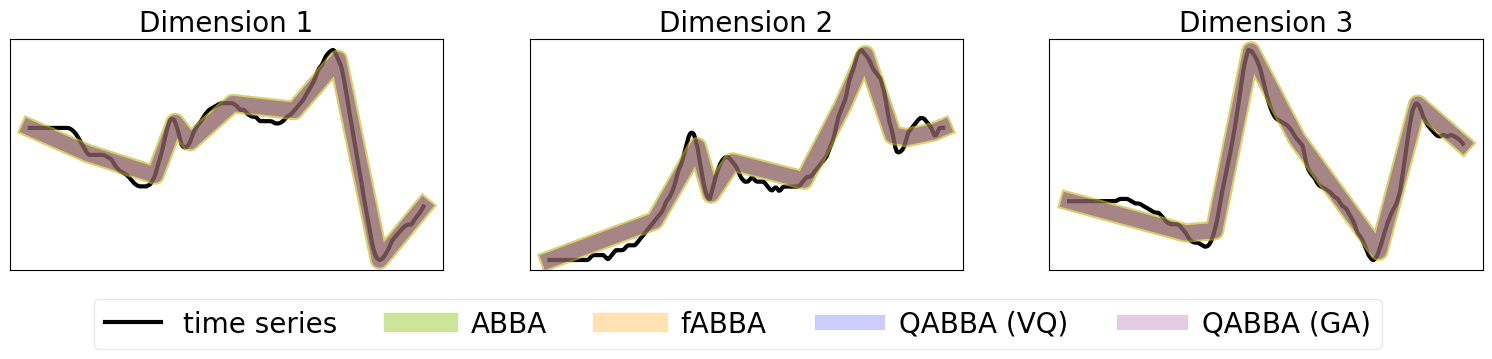

In [8]:
num = 6
data = arff.loadarff(os.path.join(_dir, os.path.join(files[num], files[num]+'_TRAIN.arff')))
multivariate_ts = preprocess(data)

mts =((multivariate_ts[0].T - multivariate_ts[0].T.mean(axis=0)) /multivariate_ts[0].T.std(axis=0)).T

jabba1 = JABBA(tol=0.05, init="agg", alpha=0.005, verbose=1)
symbols_series = jabba1.fit_transform(mts)
reconstruction_JABBA1 = jabba1.inverse_transform(symbols_series)

jabba2 = JABBA(tol=0.05, init="kmeans", k=jabba1.parameters.centers.shape[0], verbose=1)
symbols_series = jabba2.fit_transform(mts)
reconstruction_JABBA2 = jabba2.inverse_transform(symbols_series)

qabba1 = QABBA(tol=0.05, init="agg", alpha=0.005, bits_for_len=8, bits_for_inc=12, verbose=0)
symbols_series = qabba1.fit_transform(mts)
reconstruction_QABBA1= qabba1.inverse_transform(symbols_series)

qabba2 = QABBA(tol=0.05, init="kmeans", k=qabba1.parameters.centers.shape[0], bits_for_len=8, bits_for_inc=12, verbose=0)
symbols_series = qabba2.fit_transform(mts)
reconstruction_QABBA2 = qabba2.inverse_transform(symbols_series)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(19, 3))

for i in range(1):
    for j in range(3):
        ax[j].plot(mts[i*3 + j], c='black', linewidth=3, alpha=1, label='time series')
        ax[j].plot(reconstruction_JABBA1[i*3 + j], c='yellowgreen', linewidth=thickline, alpha=0.5, label='ABBA')
        ax[j].plot(reconstruction_JABBA2[i*3 + j], c='orange', linewidth=thickline, alpha=0.3, label='fABBA')
        ax[j].plot(reconstruction_QABBA1[i*3 + j], c='blue', linewidth=thinline, alpha=0.2, label='QABBA (VQ)')
        ax[j].plot(reconstruction_QABBA2[i*3 + j], c='purple', linewidth=thinline, alpha=0.2, label='QABBA (GA)')

        ax[j].set_title('Dimension '+str(j+1), fontsize=20)
        ax[j].set_xticks([]);ax[j].set_yticks([])

plt.legend(loc='lower right', bbox_to_anchor=[0.8, -0.4], ncols=5, framealpha=0.45, fontsize=20)
plt.savefig('figs/recontruction_'+files[num]+'.pdf', bbox_inches='tight')
plt.show()